(lesson-11)=
# Training and Deploying Object Detection with YOLO

### Overview
In this lesson, we will train an Object Detection model using YOLOv8. You'll be able to choose specific augmentations, batch size, resolution, and other parameters based on your system's capabilities and runtime. The dataset is already provided in YOLO format and will be used to train and evaluate the model.


### Learning Objectives
By the end of this section, you will:
- Understand the YOLO format and how to train a custom object detection model using YOLOv8.
- Experiment with different augmentations and hyperparameters for object detection.
- Evaluate the model's performance and visualize the results.

### Downloading the Dataset
The dataset for this lesson is already formatted in YOLO format. You can load it directly for training and evaluation. Ensure you have the dataset uploaded before proceeding.


### Preparing the Environment
Let's first install the required libraries and set up the environment to train our YOLOv8 model.

In [ ]:
# Install the required dependencies
!pip install ultralytics

In [ ]:
# Import required libraries
import os
from ultralytics import YOLO
import json
import zipfile
import os

### Loading the Dataset
You can either load your dataset with or without augmentations. The dataset is in YOLO format, which includes images and annotation files with bounding box information.

If you have chosen a different dataset or format, ensure it follows YOLO formatting. For this lesson, we assume that the dataset is organized in `train/`, `val/`, and `test/` directories.

In [ ]:
# Set paths to the dataset
zip_file_path = '/content/TeachingTankPlastic.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/TeachingTankPlastic')

# Set the dataset path
dataset_path = '/content/TeachingTankPlastic'

# Verify the dataset path
print(f"Dataset path is set to: {dataset_path}")
print(f"Files in dataset path: {os.listdir(dataset_path)}")

# Set train and val paths
train_path = os.path.join(dataset_path, 'train/')
val_path = os.path.join(dataset_path, 'val/')


### Create Dataset Configuration File

Copy the code cell below to create a configuration file (`teaching_tank_data.yaml`) for your dataset. This configuration file is essential for training YOLO models because it provides a structured way for YOLO to understand the paths to your training, validation, and (optionally) test datasets, as well as the class information. The configuration file tells YOLO where to find the data it needs and how many classes it should expect, which ensures that the training process runs smoothly.

Without a properly configured YAML file, YOLO would not know where the datasets are located or how to interpret the classes, leading to errors or failed training. Most of the time this will be generated with your annotation software, however it is important to double check and understand how this file works.

The configuration file includes:
- Paths to **training**, **validation**, and optionally **test** datasets.
- **Number of classes (`nc`)**: This tells YOLO how many unique classes there are to predict.
- **Class names (`names`)**: A list of class labels to ensure correct mapping during training and evaluation.

Below, you can find the cell to generate the configuration file:


In [ ]:
train: /content/TeachingTankPlastic/train/images 
val: /content/TeachingTankPlastic/valid/images    
test: /content/TeachingTankPlastic/test/images    
nc: 15  # Number of classes

names: 
  - 'Black Plastic Cap'
  - 'Blue Nitrile Glove'
  - 'Blue Plastic Cap'
  - 'Brown Multilayer Plastic'
  - 'Green Plastic Cap'
  - 'Orange Plastic Cap'
  - 'Plastic Bottle'
  - 'Purple Insulation Foam'
  - 'Purple Multilayer Plastic Bag'
  - 'Red - Orange BOPP Bag'
  - 'Red Cap'
  - 'Red Netting'
  - 'Red Plastic Straw'
  - 'Yellow Foam'
  - 'Yellow Rope'


### Customizing Augmentations and Parameters

With YOLOv8, applying augmentations during both dataset creation and training is highly beneficial. During the dataset creation phase, some augmentations are universal and should be applied regardless of what the model will be used for. For instance, basic transformations like random flips, rotations, and brightness adjustments help ensure the model can handle general variations found in real-world data. These augmentations provide a strong foundation by improving the model's ability to generalize and reduce the risk of overfitting.

However, during the training phase, more specific augmentations can be customized to anticipate particular challenges. For example, if your model is going to be deployed using a new AUV camera system that captures images at an oblique angle, or if it needs to perform well in a survey area with particularly dark conditions, adding targeted augmentations during training will make the model more robust to these conditions. By simulating real-world variability, the model becomes more resilient and adaptable to different scenarios.

In addition to augmentations, there are many parameters and arguments that you can pass to your model during training to further refine its performance. These include aspects like learning rate, batch size, optimizer, and more. The ability to customize these parameters allows you to tailor the training process to fit the specific requirements and challenges of your dataset. Ultimately, applying both general and scenario-specific augmentations, along with thoughtful parameter tuning, can significantly enhance your model's adaptability and performance in real-world situations.


### Training the YOLOv8 Model
Now that the environment is set up, and you have selected your augmentations and other parameters, we will proceed with training the YOLOv8 model.

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (pretrained on COCO dataset)
model = YOLO('yolov8n.pt')  # You can change this to another YOLOv8 model if needed

# Path to the dataset configuration YAML file
dataset_config = '/content/TeachingTankPlastic/teaching_tank_data.yaml'  # Path to the YAML file, not the directory

# Train the model
results = model.train(
    data=dataset_config,  # Pass the path to the YAML file
    epochs=100,
    batch=-1,
    imgsz=640,
    plots=True

    # Add more augmentations and parameters here! 
    # Check out the Ultralytics documentation to see 
    # what is available.
    
)

It is important to note that parameters do not have to be passed from a variable and can be directly loaded in during your training script. I purposely set up the dataset_config here so we can check out its contents. Similarly, when choosing your model, you can use a checkpoint to resume training.

### Evaluating the Model
After training, we will evaluate the model performance using validation data and calculate metrics such as mean Average Precision (mAP).

In [ ]:
# Evaluate the model on the validation dataset
import os
import json
from ultralytics import YOLO

# Assuming 'dataset_config' is the path to your YAML file
# from your training step (ipython-input-4-61cf6bd464aa):
dataset_config = '/content/TeachingTankPlastic/teaching_tank_data.yaml'

# Evaluate the model using the dataset configuration YAML
metrics = model.val(data=dataset_config)  # Use the YAML file, not the directory

print(json.dumps(metrics_dict, indent=4))

### Review Model performance

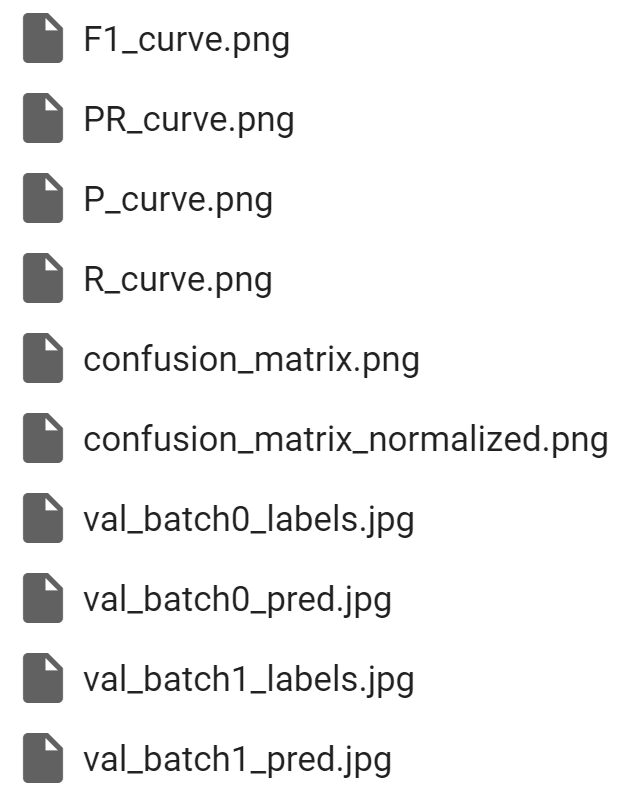

### Activity: Reflecting on Results
Now that you've trained and evaluated your model, reflect on the following questions:

- How did the augmentations and parameters affect the model's performance?
- Were there any significant differences in the mAP metrics for different classes?
- What visual observations can you make from the test results?